## Importando bibliotecas

In [64]:
import pandas as pd
import re
import regex
import nltk
from nltk.stem.lancaster import LancasterStemmer
import matplotlib.pyplot as plt
import numpy as np
import unidecode
import spacy
from collections import Counter

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = [21,9]
plt.rcParams['figure.dpi'] = 300

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('rslp')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nlp = spacy.load('en_core_web_md')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] D

In [82]:
def cpf_matcher(cpf_list):
    cpf_pattern = '\d{3}\.\d{3}\.\d{3}\-\d{2}'
    cpfs = []
    for cpf in cpf_list:
        match = re.match(cpf_pattern, cpf)
        if match:
            cpfs.append(re.match(cpf_pattern, cpf).group())
        else:
            cpfs.append('Não encontrado')
        # cpf_match = re.search(cpf_pattern,cpf).group()

    cpf_df = pd.DataFrame(data = cpfs).fillna('N/A')
    display(cpf_df)

cpf_list = ['123','123.910.121-71','541.741.783-90','172.123.455-98','871.901.412-01']
cpf_matcher(cpf_list)


,0
0,Não encontrado
1,123.910.121-71
2,541.741.783-90
3,172.123.455-98
4,871.901.412-01


In [66]:
def address_matcher(address_list):
    
    address_pattern = '(?P<Rua>[\w\s]+), ' + \
                      '(?P<Número>\d+), ' + \
                      '(apt? (?P<Apto>\d+), )?' + \
                      '((?P<Bairro>[\w\s]+), )?' + \
                      '(cep (?P<CEP>\d{5}\-\d{3})). ' + \
                      '(?P<Cidade>[\w\s]+), ' + \
                      '(?P<Estado>[A-Z]{2})'

    rows = []
    for address in address_list:
        rows.append(re.match(address_pattern, address,re.IGNORECASE).groupdict())

    address_df = pd.DataFrame(data = rows).fillna('N/A')
    display(address_df)

address_list = ['Rua José da Silva, 346, Farol, CEP 57002-220. Maceió, AL.',
             'Rua da Consolação, 9999, apt 302, CEP 11022-202. São Paulo, SP.',
             'Avenida Atlântica, 420, ap 1001, Copacabana, cep 22011-010. Rio de Janeiro, RJ.']

address_matcher(address_list)

,Rua,Número,Apto,Bairro,CEP,Cidade,Estado
0,Rua José da Silva,346,N/A,Farol,57002-220,Maceió,AL
1,Rua da Consolação,9999,302,N/A,11022-202,São Paulo,SP
2,Avenida Atlântica,420,1001,Copacabana,22011-010,Rio de Janeiro,RJ


In [67]:
def url_matcher(url_string):
    url_pattern = '(?:(?:ftp|https?):\/\/)?[\w/\-?=@%_&!$#;.]+\.[\w/\-?=@%_&!$#;.]+'
    found_urls = re.findall(url_pattern,url_string)
    print(fr'Lista de URLs encontradas na string: {found_urls}')


url_string = "Examples of URLs are: youtube.com, https://www.google.com/, https://ic.ufal.br/pt-br, http://ftp.unicamp.br/, https://github.com/rafael-ml/sorting_station"
url_matcher(url_string)

Lista de URLs encontradas na string: ['youtube.com', 'https://www.google.com/', 'https://ic.ufal.br/pt-br', 'http://ftp.unicamp.br/', 'https://github.com/rafael-ml/sorting_station']


In [68]:
def citation_matcher(citation_list):
    initials = '[A-Z]\.'
    last_name = '[A-Z][a-z]+'
    author = f'(?P<Autor>{last_name},?(?:\s{initials})+)'
    authors = f'({author})(((?:, ({author}))*(?:, & ({author}))))*'
    year = '(?P<Ano>\d{4})'
    title = '(?P<Título>[\w,\[\]\-\s:,()]+)'
    publisher = '(?P<Editora>[\w\s:\-,]+)'

    citation_pattern = f'{authors} \({year}\)\. {title}\. {publisher}\.'
    citations = []
    for citation in citation_list:
        citation_match = regex.match(citation_pattern,citation).capturesdict()
        for key in citation_match.keys():
            citation_match[key] = ' ; '.join(citation_match[key])
        citations.append(citation_match)
    
    citation_df = pd.DataFrame(data = citations)
    display(citation_df)

citation_list = ['Brader, T. (2006). Campaigning for hearts and minds: How emotional appeals in political ads work. University of Chicago Press.',
                  'Brock, J., & Arciuli, J. (2014). Communication in autism [eBook edition]. John Benjamins Publishing Company.',
                  'Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.',
                  'Miller, T. E., & Schuh, J. H. (2005). Promoting reasonable expectations: Aligning student and institutional views of the college experience. Jossey-Bass.',
                  'Wright, S. (2004). The anthropology of organizations. Routledge.',
                  'Fleming, Q. (2003). Project procurement management: contracting, subcontracting, teaming. FMC Press.',
                  'Alberts, B., & Walter, P. (2002). Molecular biology of the cell. Garland Publishing.',
                  'Jaramillo, C., Gilbert, A. N., Bulixi, T. P., Farland, N., Smith, L. J., Leland, K., Fran, J., Moore, R. B., Garrett, B. C., Done, N. D., Witting, R. E., Dunkle, F. T., Smith, J. M., Johnson, H. H., Bath, N., Williams, S. T., Brown, N., Jones, T. R., Miller J., & Wintle, N. (2012). Understanding new technology. Neal-Schuman Publishers.']

citation_matcher(citation_list)

,Autor,Ano,Título,Editora
0,"Brader, T.",2006,Campaigning for hearts and minds: How emotional appeals in political ads work,University of Chicago Press
1,"Brock, J. ; Arciuli, J.",2014,Communication in autism [eBook edition],John Benjamins Publishing Company
2,"Manning, C. D. ; Manning, C. D. ; Schutze, H.",1999,Foundations of statistical natural language processing,MIT press
3,"Miller, T. E. ; Schuh, J. H.",2005,Promoting reasonable expectations: Aligning student and institutional views of the college experience,Jossey-Bass
4,"Wright, S.",2004,The anthropology of organizations,Routledge
5,"Fleming, Q.",2003,"Project procurement management: contracting, subcontracting, teaming",FMC Press
6,"Alberts, B. ; Walter, P.",2002,Molecular biology of the cell,Garland Publishing
7,"Jaramillo, C. ; Gilbert, A. N. ; Bulixi, T. P. ; Farland, N. ; Smith, L. J. ; Leland, K. ; Fran, J. ; Moore, R. B. ; Garrett, B. C. ; Done, N. D. ; Witting, R. E. ; Dunkle, F. T. ; Smith, J. M. ; Johnson, H. H. ; Bath, N. ; Williams, S. T. ; Brown, N. ; Jones, T. R. ; Miller J. ; Wintle, N.",2012,Understanding new technology,Neal-Schuman Publishers


In [69]:
def sub_date(date_list):
    day = '\d{2}'
    month = '\d{2}'
    year = '\d{4}'
    date_pattern = fr'({day})\/({month})\/({year})'
    new_date_pattern = fr'\2-\1-\3'
    
    dates = []
    for date in date_list:
        new_date_format = re.sub(date_pattern,new_date_pattern,date)
        dates.append(new_date_format)
    
    date_df = pd.DataFrame(data = dates,columns = ['Datas'])
    display(date_df)

date_list = [r'01/03/2015',r'13/12/2010',r'05/09/1999',r'24/07/2019',r'18/10/2005',r'31/10/2020']
sub_date(date_list)

,Datas
0,03-01-2015
1,12-13-2010
2,09-05-1999
3,07-24-2019
4,10-18-2005
5,10-31-2020


## Usando sua base de textos, resolva as seguintes questões: 

## 6 - Determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma. 


,article,comprimento
0,"The UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Chamber of Commerce (BCC) has said.\n\nThe group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced ""major risks"" and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.\n\nManufacturers' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.\n\n""Despite some positive news for the export sector, there are worrying signs for manufacturing,"" the BCC said. ""These results reinforce our concern over the sector's persistent inability to sustain recovery."" The outlook for the service sector was ""uncertain"" despite an increase in exports and orders over the quarter, the BCC noted.\n\nThe BCC found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of 2004. The reduced threat of interest rate increases had contributed to improved confidence, it said. The Bank of England raised interest rates five times between November 2003 and August last year. But rates have been kept on hold since then amid signs of falling consumer confidence and a slowdown in output. ""The pressure on costs and margins, the relentless increase in regulations, and the threat of higher taxes remain serious problems,"" BCC director general David Frost said. ""While consumer spending is set to decelerate significantly over the next 12-18 months, it is unlikely that investment and exports will rise sufficiently strongly to pick up the slack.""\n",1953
1,"Climate change and the fight against Aids are leading the list of concerns for the first day of the World Economic Forum in the Swiss resort of Davos.\n\nSome 2,000 business and political leaders from around the globe will listen to UK Prime Minister Tony Blair's opening speech on Wednesday. Mr Blair will focus on Africa's development plans and global warming. Earlier in the day came an update on efforts to have 3 million people on anti-Aids drugs by the end of 2005. The World Health Organisation (WHO) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. A $2bn ""funding gap"" still stood in the way of hitting the 2005 target, the WHO said.\n\nThe themes to be stressed by Mr Blair - whose attendance was announced at the last minute - are those he wants to dominate the UK's chairmanship of the G8 group of industrialised states. Other issues to be discussed at the five-day conference range from China's\n\neconomic power to Iraq's future after this Sunday's elections. Aside from Mr Blair, more than 20 other world leaders are expected to attend including French President Jacques Chirac - due to speak by video link after bad weather delayed his helicopter - and South African President Thabo Mbeki, whose arrival has been delayed by Ivory Coast peace talks. The Ukraine's new president, Viktor Yushchenko, will also be there - as will newly elected Palestinian leader Mahmoud Abbas. Showbiz figures will also put in an appearance, from U2 frontman Bono - a well-known campaigner on trade and development issues - to Angelina Jolie, a goodwill campaigner for the UN on refugees.\n\nUnlike previous years, protests against the WEF are expected to be muted. Anti-globalisation campaigners have called off a demonstration planned for the weekend. At the same time, about 100,000 people are expected to converge on the Brazilian resort of Porto Alegre for the World Soc

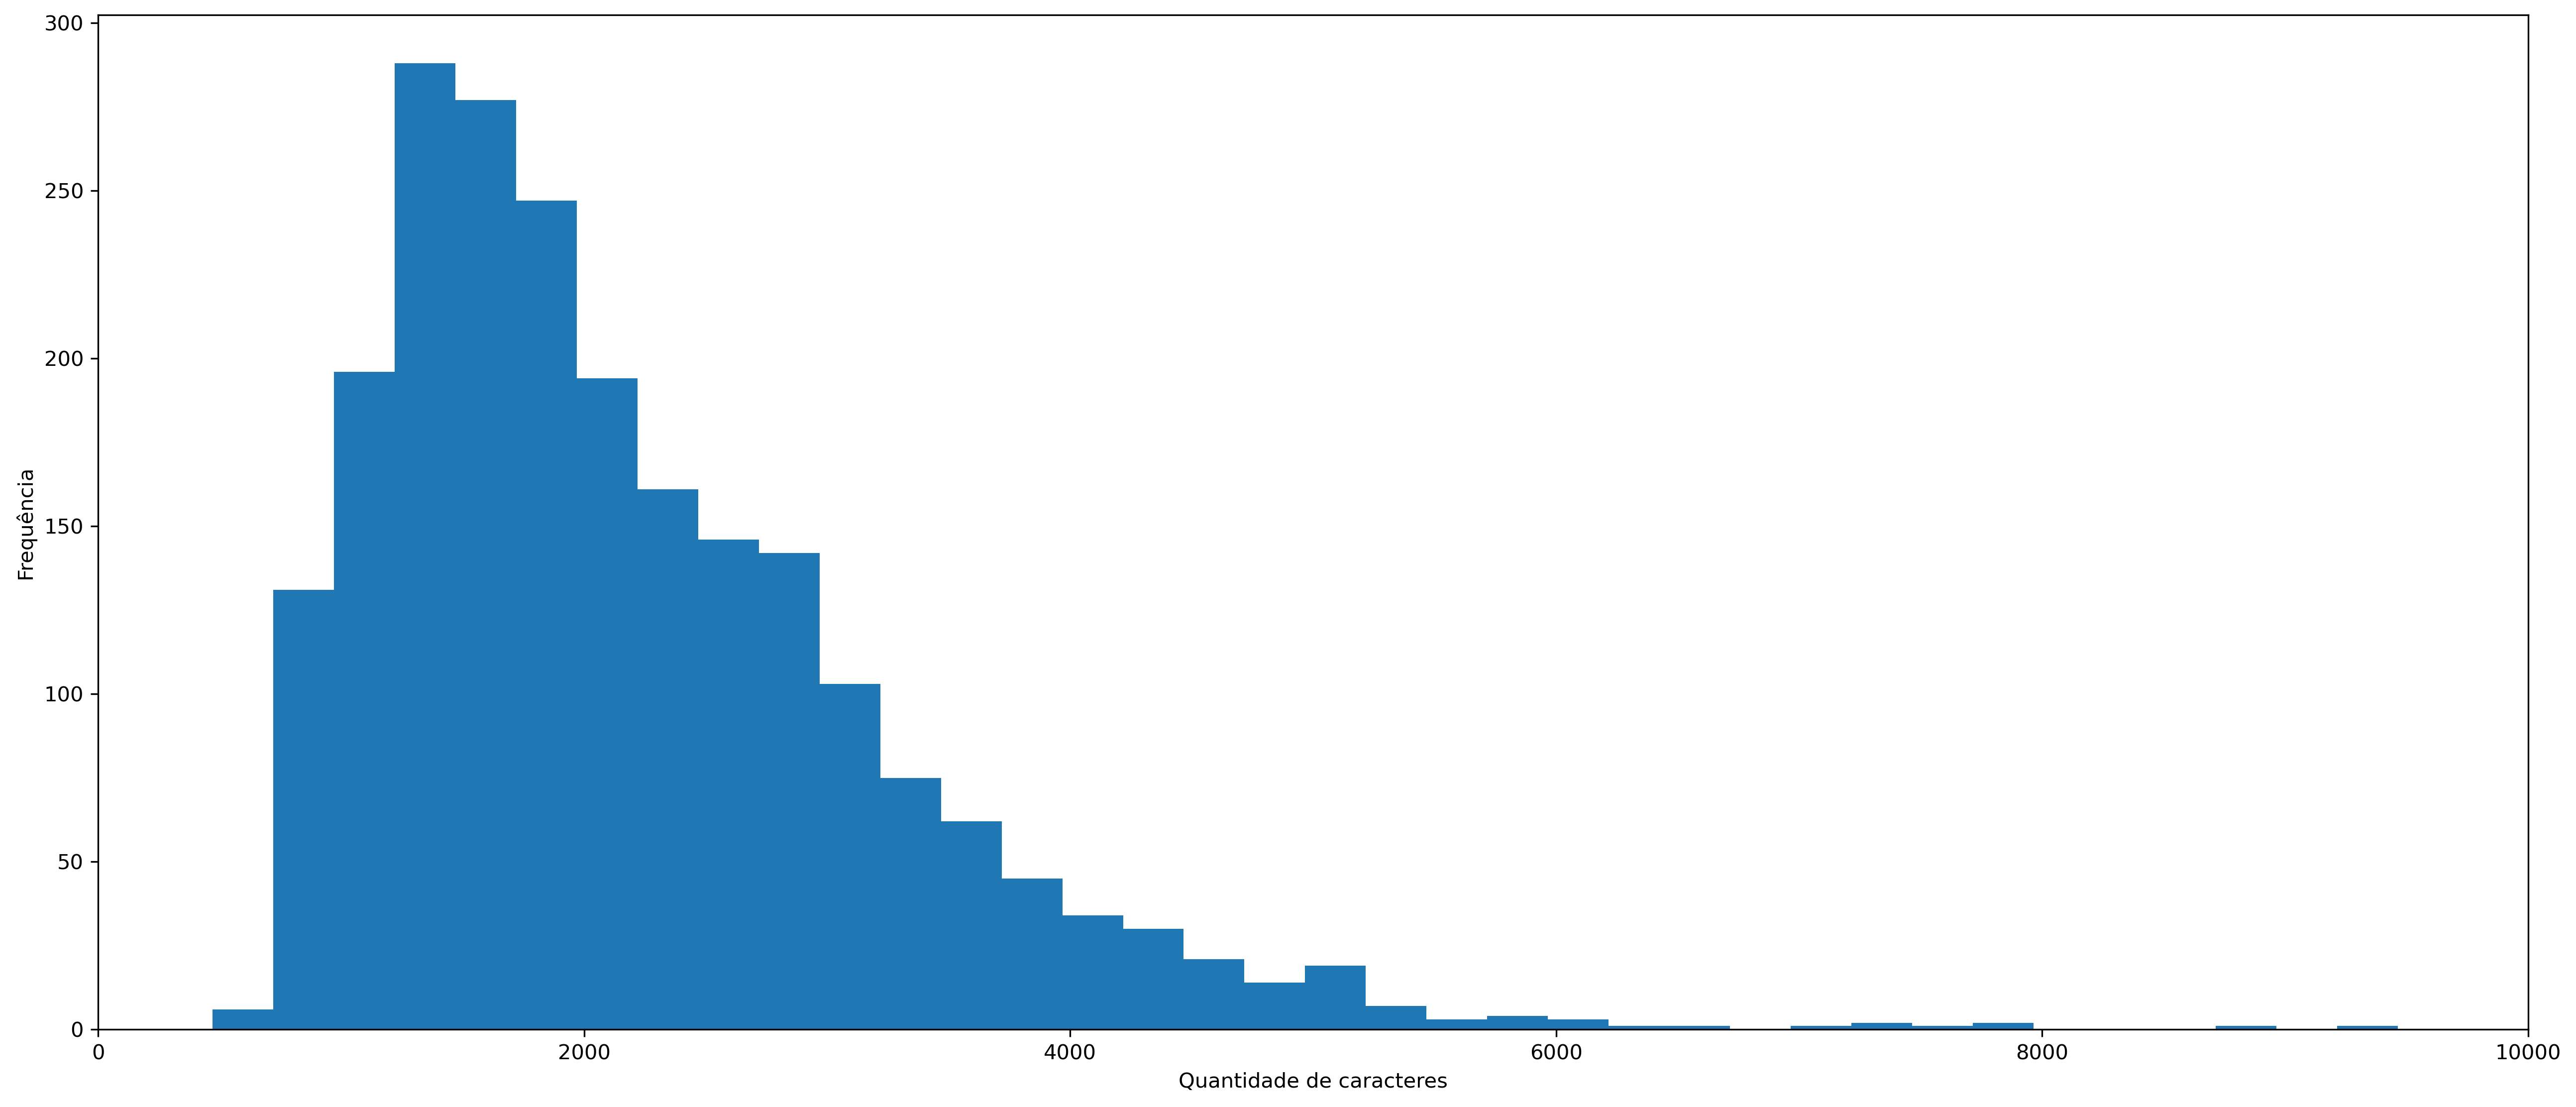

In [70]:
def get_text_len_distribution(df):
    df['comprimento'] = df['article'].apply(len)
    display(df[['article','comprimento']].head(20))
    df['article'].str.len().plot.hist(bins =  100,xlim = (0,10000))
    plt.xlabel('Quantidade de caracteres')
    plt.ylabel('Frequência')
    # plt.figure(figsize=(30,10))
    plt.show()


df = pd.read_csv(r'bbc\files_and_targets.csv')
get_text_len_distribution(df)


## 7 - Aplique os seguintes passos de pré-processamento aos textos:  
• Remova todas as palavras que contêm números;  
• Converta as palavras para minúsculas;  
• Remova pontuação;  
• Tokenize os textos em palavras, gerando um dicionário único com n tokens e convertendo cada texto em um vetor de dimensão n com a respectiva contagem de palavras. 

Em seguida, encontre as 10 palavras mais frequentes da base de textos. 


In [71]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=False, lst_stopwords=None, remove_accents = False):
    
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub('\w*\d\w*', ' ', text)
    text = ''.join(c for c in text if not c.isdigit())
            
    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
              
    if flg_stemm == True:
        ps = LancasterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    if flg_lemm == True:
        lst_text = nlp(text)
        lst_text = [word.lemma_ for word in lst_text if word.pos_ == 'VERB' or word.pos_ == 'NOUN']
    
    if remove_accents == True:
        lst_text = [unidecode.unidecode(word) for word in lst_text]
    
    text = " ".join(lst_text)
    return text

def get_tokens(x):
    doc = nlp(x)
    text = [token.text for token in doc]
    final_text = ' '.join(text)

    return final_text

def clean_text(df):
    df['clean_text'] = df['article'].apply(lambda x: utils_preprocess_text(x,False,False,None,False))
    df['tokenized_text'] = df['clean_text'].apply(lambda x: get_tokens(x))
    display(df.head(5))
    return df
    
    
df = pd.read_csv(r'bbc\files_and_targets.csv')
df = clean_text(df)

,filename,title,article,target,clean_text,tokenized_text
0,289.txt,UK economy facing 'major risks'\n,"The UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Chamber of Commerce (BCC) has said.\n\nThe group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced ""major risks"" and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.\n\nManufacturers' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.\n\n""Despite some positive news for the export sector, there are worrying signs for manufacturing,"" the BCC said. ""These results reinforce our concern over the sector's persistent inability to sustain recovery."" The outlook for the service sector was ""uncertain"" despite an increase in exports and orders over the quarter, the BCC noted.\n\nThe BCC found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of 2004. The reduced threat of interest rate increases had contributed to improved confidence, it said. The Bank of England raised interest rates five times between November 2003 and August last year. But rates have been kept on hold since then amid signs of falling consumer confidence and a slowdown in output. ""The pressure on costs and margins, the relentless increase in regulations, and the threat of higher taxes remain serious problems,"" BCC director general David Frost said. ""While consumer spending is set to decelerate significantly over the next 12-18 months, it is unlikely that investment and exports will rise sufficiently strongly to pick up the slack.""\n",business,the uk manufacturing sector will continue to face serious challenges over the next two years the british chamber of commerce bcc has said the groups quarterly survey of companies found exports had picked up in the last three months of to their best levels in eight years the rise came despite exchange rates being cited as a major concern however the bcc found the whole uk economy still faced major risks and warned that growth is set to slow it recently forecast economic growth will slow from more than in to a little below in both and manufacturers domestic sales growth fell back slightly in the quarter the survey of firms found employment in manufacturing also fell and job expectations were at their lowest level for a year despite some positive news for the export sector there are worrying signs for manufacturing the bcc said these results reinforce our concern over the sectors persistent inability to sustain recovery the outlook for the service sector was uncertain despite an increase in exports and orders over the quarter the bcc noted the bcc found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of the reduced threat of interest rate increases had contributed to improved confidence it said the bank of england raised interest rates five times between november and august last year but rates have been kept on hold since then amid signs of falling consumer confidence and a slowdown in output the pressure on costs and margins the relentless increase in regulations and the threat of higher taxes remain serious problems bcc director general david frost said while consumer spending is set to decelerate significantly over the next months it is unlikely that investment and exports will rise sufficiently strongly to pick up the slack,the uk manufacturing sector will continue to face serious 

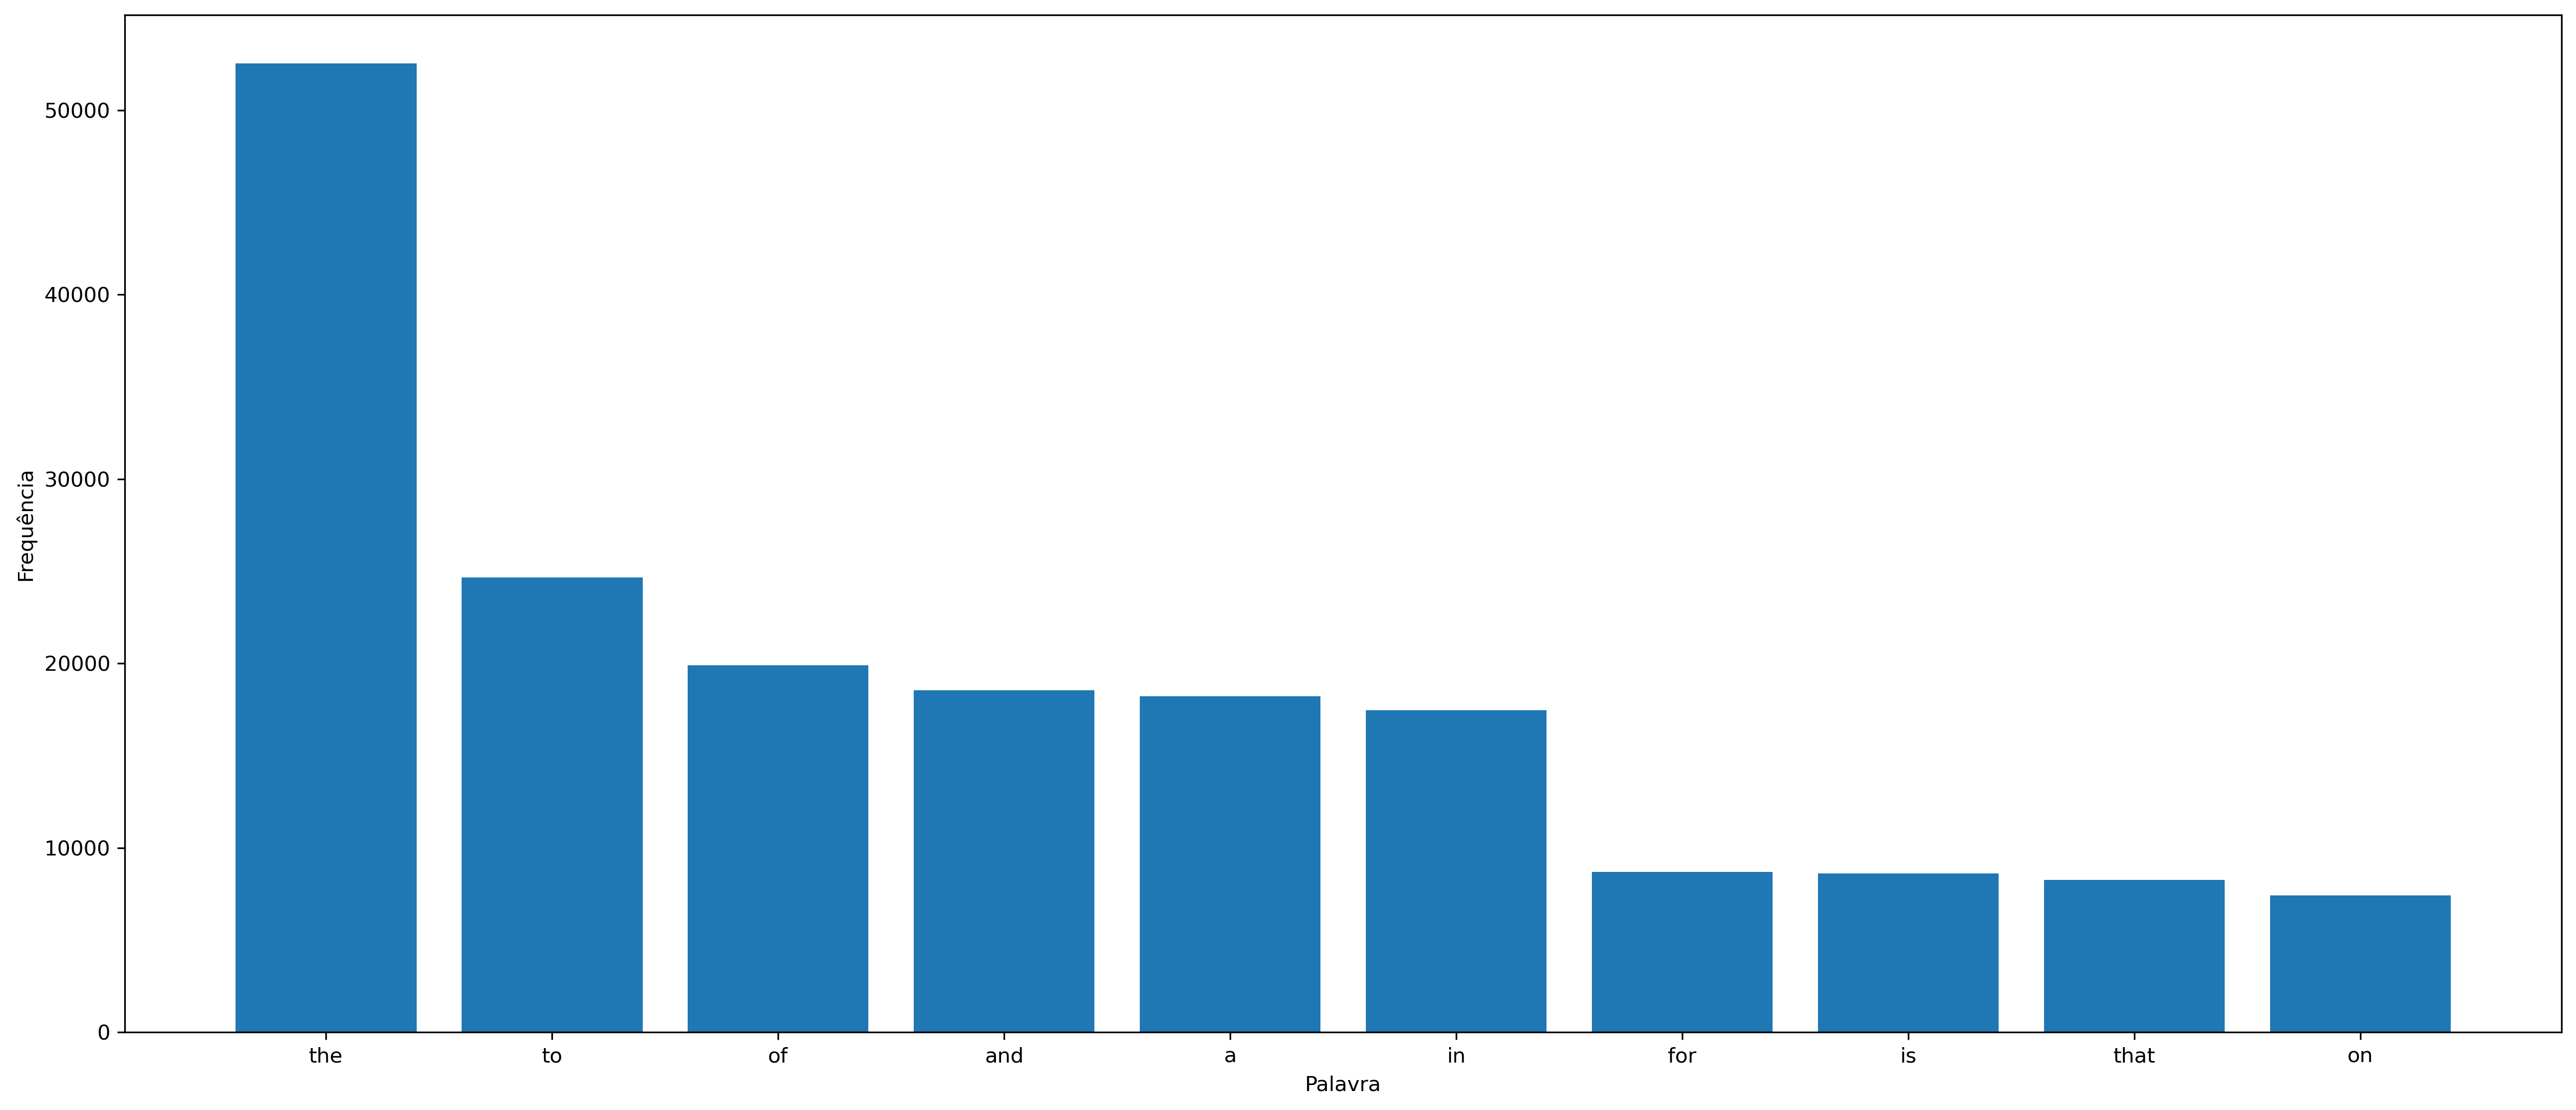

In [72]:
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di

def count_most_frequent(df,n = 10):
    frequencies = Counter(" ".join(df["tokenized_text"]).split()).most_common(n)
    dictionary = {}
    freq_dict = Convert(frequencies,dictionary)
    for key in freq_dict:
        freq_dict[key] = freq_dict[key][0]

    plt.bar(freq_dict.keys(),freq_dict.values())
    plt.xlabel('Palavra')
    plt.ylabel('Frequência')

count_most_frequent(df,10)

## 8 - Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior: 
• Remova stopwords;  
• Realize rotulação de POS;  
• Realize stemização;  

a) Exiba os resultados em alguns textos.  
b) Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão  anterior.  
c) Repita a letra b) usando os tokens stemizados.  
d) Verifique quais são as classes gramaticais mais frequentes. 


## a)

In [83]:
def get_tag(x):
    doc = nlp(x)
    tags = [token.pos_ for token in doc]
    final_tags = ' '.join(tags)

    return final_tags

def count_most_frequent_tag(df,n = 19):
    frequencies = Counter(" ".join(df["pos_tags"]).split()).most_common(n)
    dictionary = {}
    freq_dict = Convert(frequencies,dictionary)
    for key in freq_dict:
        freq_dict[key] = freq_dict[key][0]

    plt.bar(freq_dict.keys(),freq_dict.values())
    plt.xlabel('Classe gramatical')
    plt.ylabel('Frequência')

def count_most_frequent_after_stopword_removal(df,n = 10):
    frequencies = Counter(" ".join(df["clean_text_v2"]).split()).most_common(n)
    dictionary = {}
    freq_dict = Convert(frequencies,dictionary)
    for key in freq_dict:
        freq_dict[key] = freq_dict[key][0]

    plt.bar(freq_dict.keys(),freq_dict.values())
    plt.xlabel('Palavra')
    plt.ylabel('Frequência')

def clean_text(df):
    df['clean_text_v2'] = df['article'].apply(lambda x: utils_preprocess_text(x,False,False,stopwords,False))
    df['pos_tags'] = df['clean_text_v2'].apply(lambda x: get_tag(x))
    df['clean_text_v3'] = df['article'].apply(lambda x: utils_preprocess_text(x,True,False,stopwords,False))
    display(df[['article','clean_text_v2','clean_text_v3']].head(5))
    return df

df = pd.read_csv(r'bbc\files_and_targets.csv')
df = clean_text(df)





,article,clean_text_v2,clean_text_v3
0,"The UK manufacturing sector will continue to face ""serious challenges"" over the next two years, the British Chamber of Commerce (BCC) has said.\n\nThe group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. The rise came despite exchange rates being cited as a major concern. However, the BCC found the whole UK economy still faced ""major risks"" and warned that growth is set to slow. It recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.\n\nManufacturers' domestic sales growth fell back slightly in the quarter, the survey of 5,196 firms found. Employment in manufacturing also fell and job expectations were at their lowest level for a year.\n\n""Despite some positive news for the export sector, there are worrying signs for manufacturing,"" the BCC said. ""These results reinforce our concern over the sector's persistent inability to sustain recovery."" The outlook for the service sector was ""uncertain"" despite an increase in exports and orders over the quarter, the BCC noted.\n\nThe BCC found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of 2004. The reduced threat of interest rate increases had contributed to improved confidence, it said. The Bank of England raised interest rates five times between November 2003 and August last year. But rates have been kept on hold since then amid signs of falling consumer confidence and a slowdown in output. ""The pressure on costs and margins, the relentless increase in regulations, and the threat of higher taxes remain serious problems,"" BCC director general David Frost said. ""While consumer spending is set to decelerate significantly over the next 12-18 months, it is unlikely that investment and exports will rise sufficiently strongly to pick up the slack.""\n",uk manufacturing sector continue face serious challenges next two years british chamber commerce bcc said groups quarterly survey companies found exports picked last three months best levels eight years rise came despite exchange rates cited major concern however bcc found whole uk economy still faced major risks warned growth set slow recently forecast economic growth slow little manufacturers domestic sales growth fell back slightly quarter survey firms found employment manufacturing also fell job expectations lowest level year despite positive news export sector worrying signs manufacturing bcc said results reinforce concern sectors persistent inability sustain recovery outlook service sector uncertain despite increase exports orders quarter bcc noted bcc found confidence increased quarter across manufacturing service sectors although overall failed reach levels start reduced threat interest rate increases contributed improved confidence said bank england raised interest rates five times november august last year rates kept hold since amid signs falling consumer confidence slowdown output pressure costs margins relentless increase regulations threat higher taxes remain serious problems bcc director general david frost said consumer spending set decelerate significantly next months unlikely investment exports rise sufficiently strongly pick slack,uk manufact sect continu fac sery challeng next two year brit chamb commerc bcc said group quart survey company found export pick last three month best level eight year ris cam despit exchang rat cit maj concern howev bcc found whol uk econom stil fac maj risk warn grow set slow rec forecast econom grow slow littl manufact domest sal grow fel back slight quart survey firm found employ manufact also fel job expect lowest level year despit posit new export sect worry sign manufact bcc said result reinforc concern sect persist in sustain recovery outlook serv sect uncertain despit increas export ord quart b

## b)

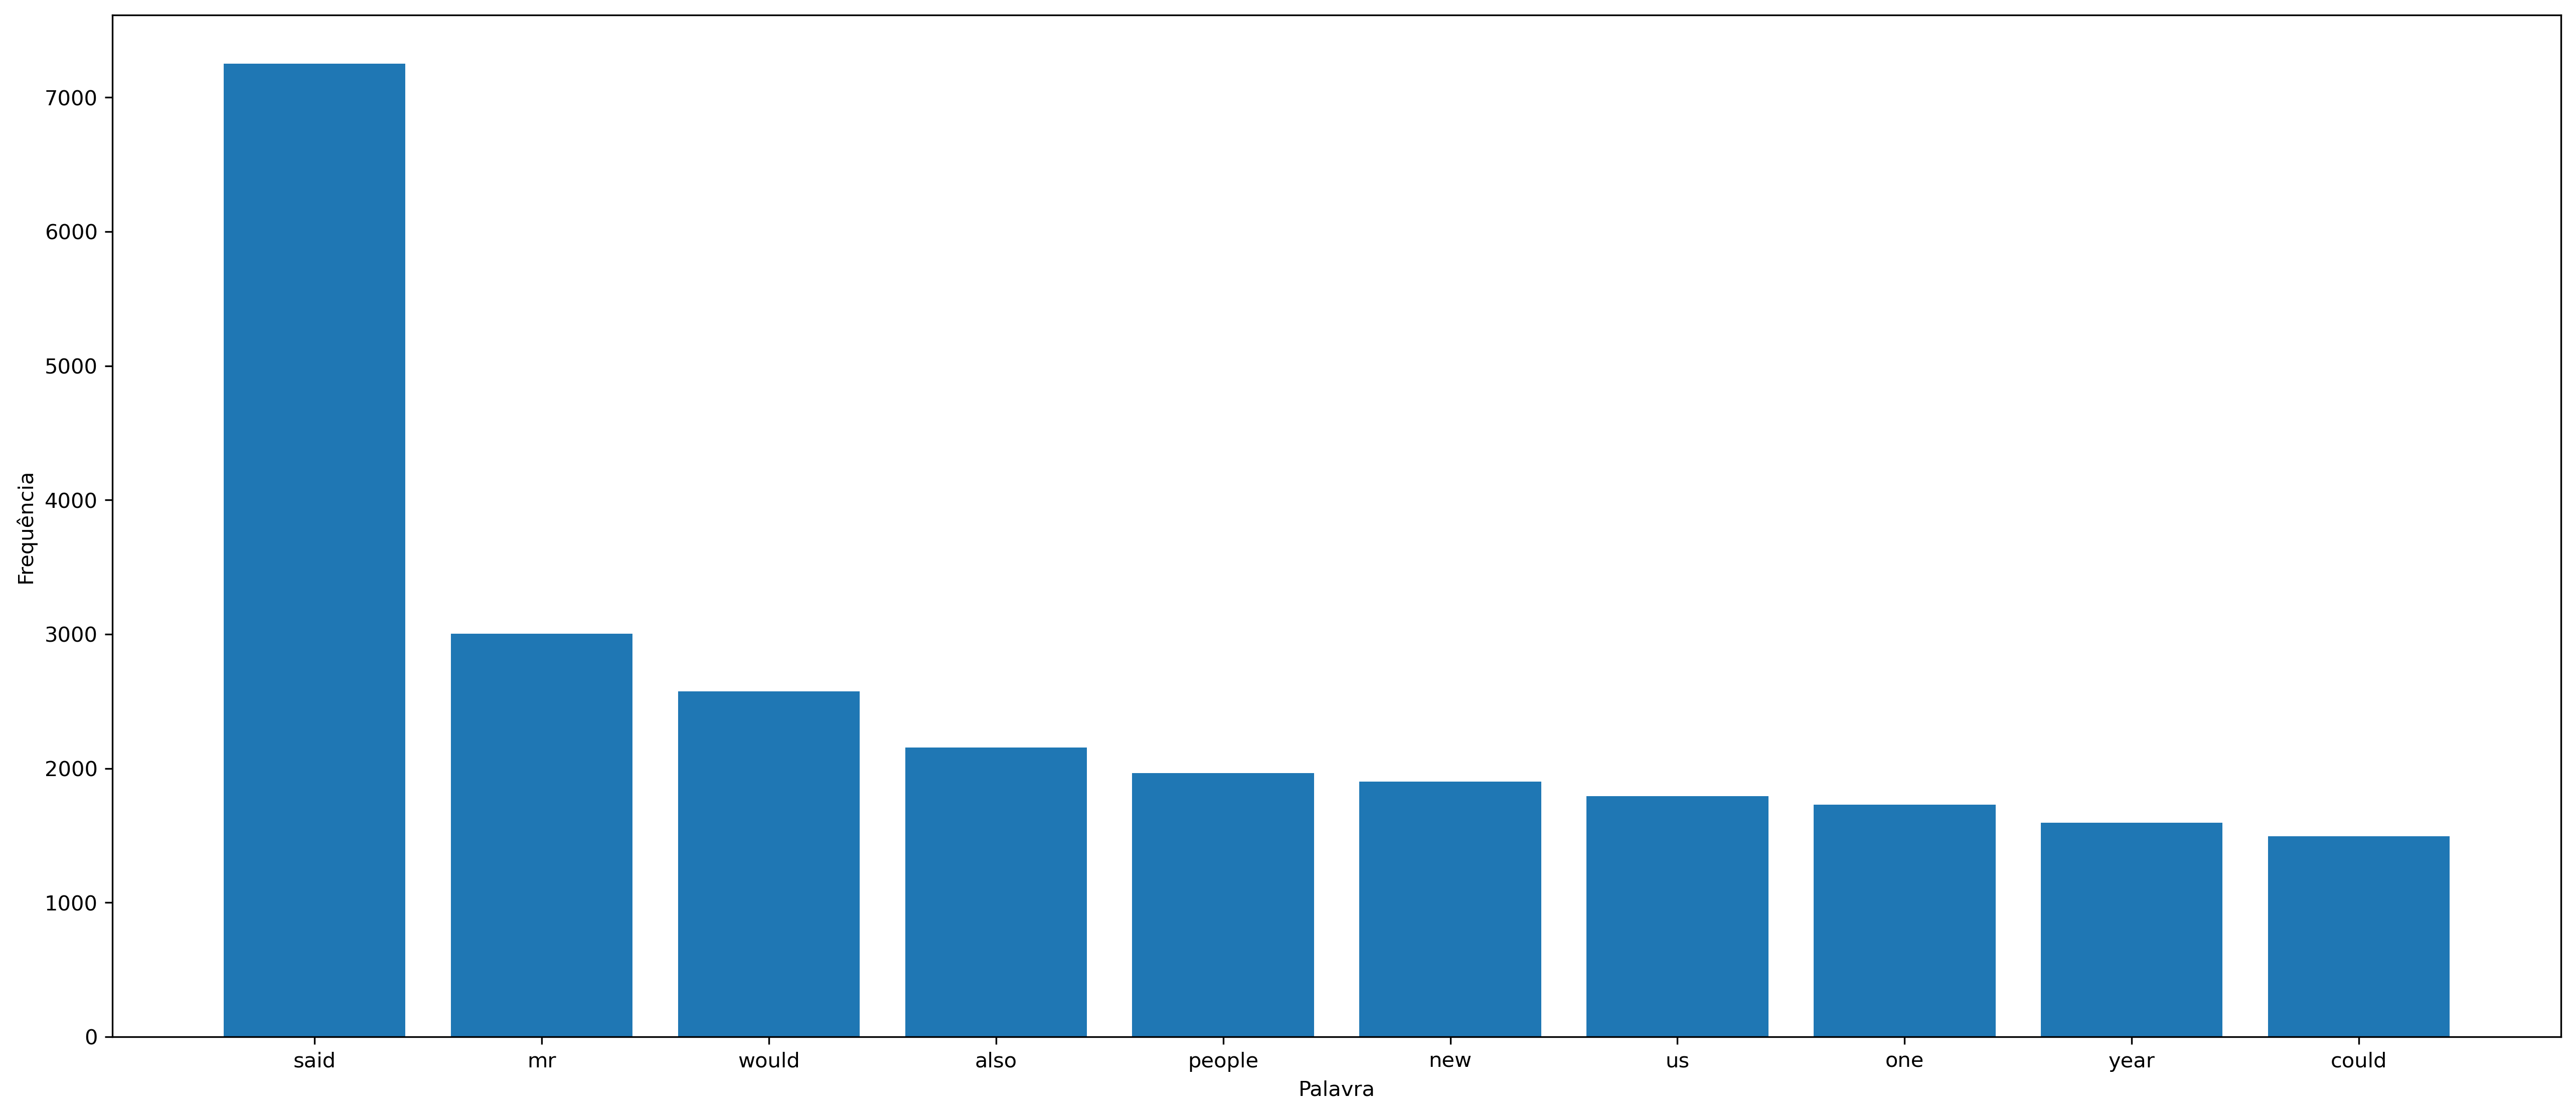

In [74]:
count_most_frequent_after_stopword_removal(df,10)

## c)

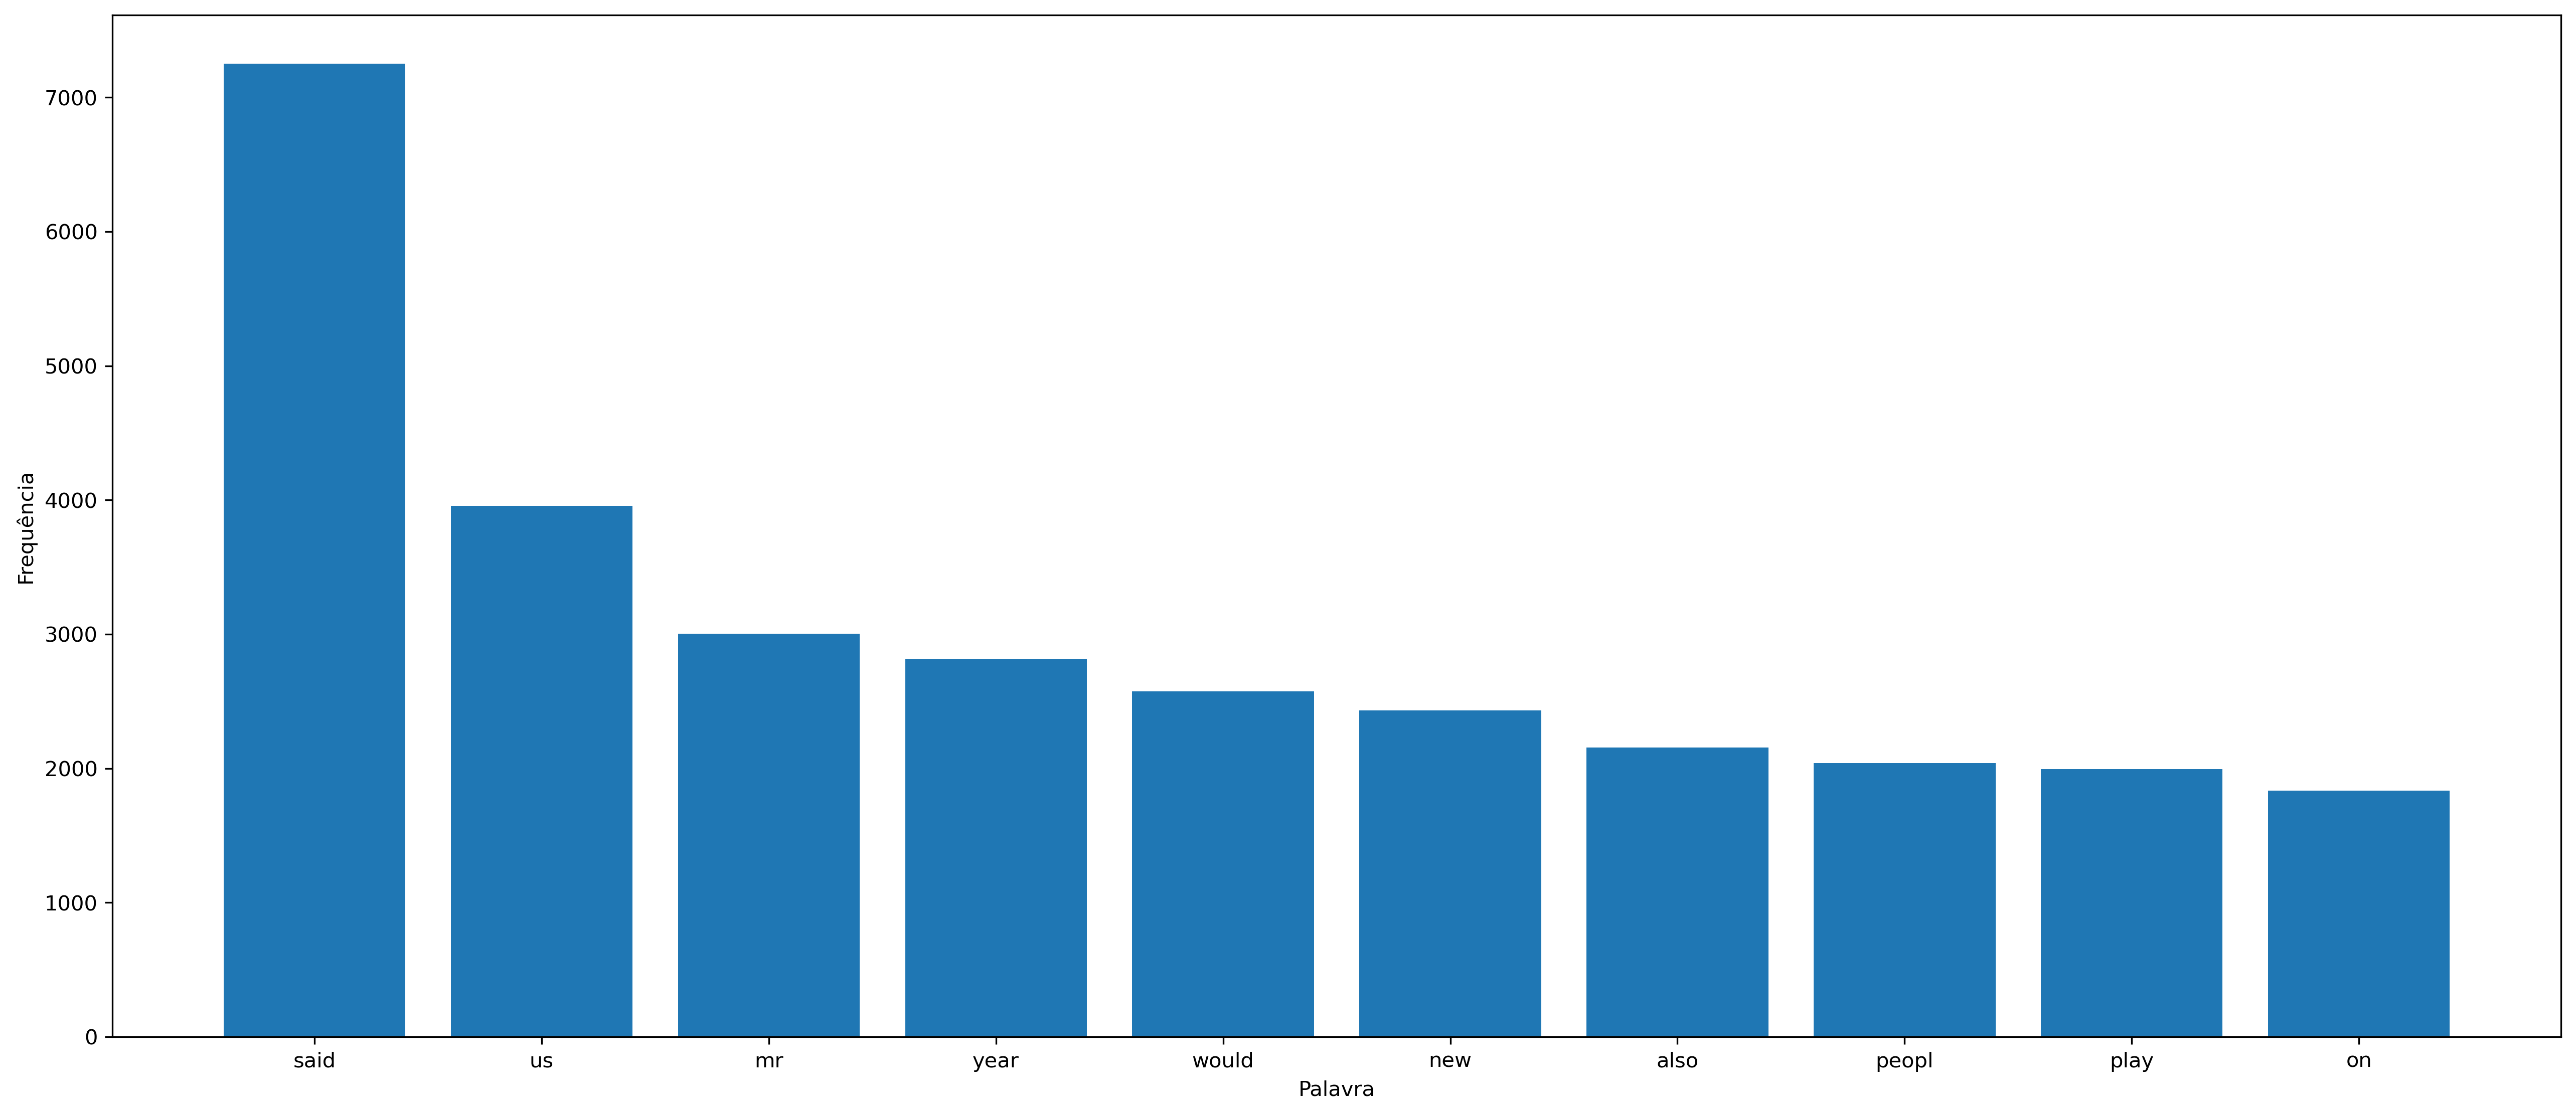

In [75]:
def count_most_frequent_after_stopword_removal_stemming(df,n = 10):
    frequencies = Counter(" ".join(df["clean_text_v3"]).split()).most_common(n)
    dictionary = {}
    freq_dict = Convert(frequencies,dictionary)
    for key in freq_dict:
        freq_dict[key] = freq_dict[key][0]

    plt.bar(freq_dict.keys(),freq_dict.values())
    plt.xlabel('Palavra')
    plt.ylabel('Frequência')

count_most_frequent_after_stopword_removal_stemming(df,10)

## d)

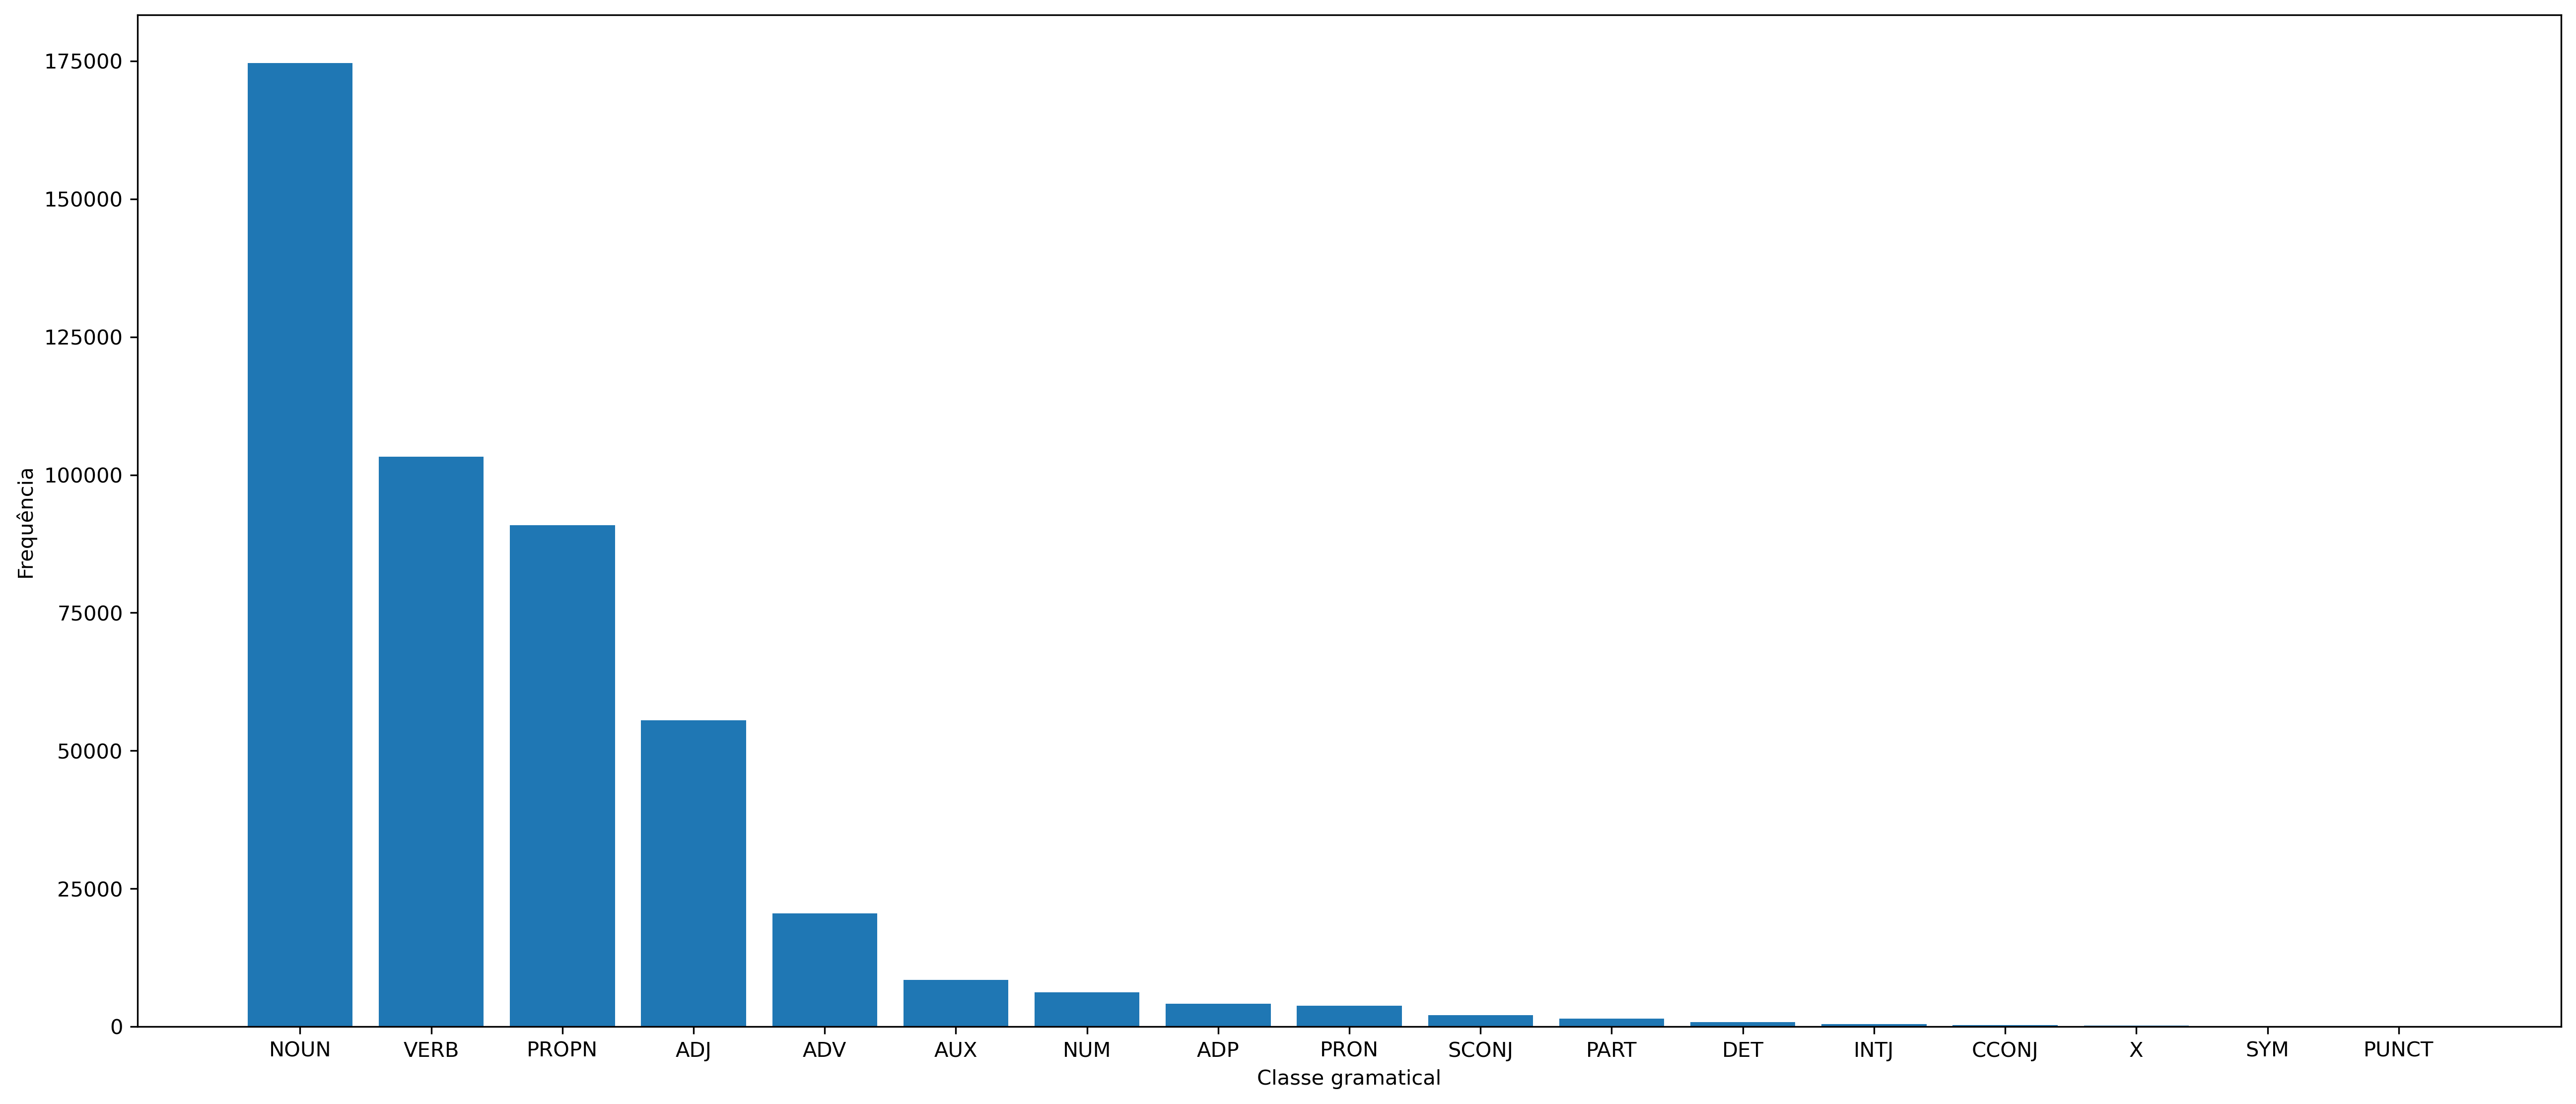

In [76]:
count_most_frequent_tag(df,19)